In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import gc

Using TensorFlow backend.


In [2]:
def loadDataset(rootDir):
    
    images = []
    labels = []
    classes = []
    
    for folder in os.listdir(rootDir):
        
        if ('Tomato' not in folder):
            continue
            
        classes.append(folder)
        
        folderPath = os.path.join(rootDir, folder)
        
        imagePaths = [os.path.join(folderPath, file) for file in os.listdir(folderPath) if file.endswith('.JPG')]
        
        for imagePath in imagePaths[:800]:
            
            images.append(cv2.imread(imagePath, cv2.IMREAD_UNCHANGED))
            labels.append(folder)
            
    #Check that all images have the desired size.
    for image in images:
        if (image.shape != (256, 256, 3)):
            cv2.resize(image, (256, 256))
            
    #Normalize image vectors.
    np_images = np.asarray(images, dtype = np.float16) / 255.0
            
    return np_images, labels, classes

In [3]:
#Load data.
images, labels, classes = loadDataset('/kaggle/input/plantdisease/PlantVillage')

#One-hot the labels.
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

#Split into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [4]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 6058
number of test examples = 1515
X_train shape: (6058, 256, 256, 3)
Y_train shape: (6058, 10)
X_test shape: (1515, 256, 256, 3)
Y_test shape: (1515, 10)


In [5]:
#Free some memory.
del images
del labels
gc.collect()

82

In [6]:
gc.collect()

20

In [7]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [8]:
nsamples, nx, ny, size = x_train.shape
print(nsamples,nx,ny,size)
x_train_2d = x_train.reshape((nsamples,nx*ny*size))

nsamples, nx, ny, size = x_test.shape
print(nsamples,nx,ny,size)
x_test_2d = x_test.reshape((nsamples,nx*ny*size))

6058 256 256 3
1515 256 256 3


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model_dt = DecisionTreeClassifier()
clf=model_dt.fit(x_train_2d, y_train)

In [11]:
pred_dt = clf.predict(x_test_2d)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test.argmax(axis=1),pred_dt.argmax(axis=1))

In [13]:
cm

array([[71, 23, 10,  5,  5,  9, 15, 19,  4,  5],
       [19, 39, 20, 18, 17,  7, 21, 16,  8,  7],
       [10, 13, 59, 15, 13, 18, 14, 12,  9, 10],
       [ 7, 14, 15, 65, 14, 12, 12,  8, 11,  4],
       [ 9, 14, 19, 16, 49, 16, 18, 12, 10,  4],
       [ 7, 10, 10,  6, 15, 42, 24, 15, 12, 12],
       [ 9, 18, 10, 10, 12, 22, 39, 14,  5, 17],
       [12, 26, 12,  2,  8, 11,  6, 58,  4,  5],
       [ 2,  4,  7,  8,  8,  5, 10,  8, 11,  8],
       [ 7,  6, 18,  8, 13, 11, 16,  9, 10, 53]])

In [20]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred_dt)

In [21]:
print ('Accuracy: {:.4%}'.format(acc))

Accuracy: 32.0792%


In [22]:
import pandas as pd
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,71,23,10,5,5,9,15,19,4,5
1,19,39,20,18,17,7,21,16,8,7
2,10,13,59,15,13,18,14,12,9,10
3,7,14,15,65,14,12,12,8,11,4
4,9,14,19,16,49,16,18,12,10,4
5,7,10,10,6,15,42,24,15,12,12
6,9,18,10,10,12,22,39,14,5,17
7,12,26,12,2,8,11,6,58,4,5
8,2,4,7,8,8,5,10,8,11,8
9,7,6,18,8,13,11,16,9,10,53


Text(83.40000000000006, 0.5, 'Predicted')

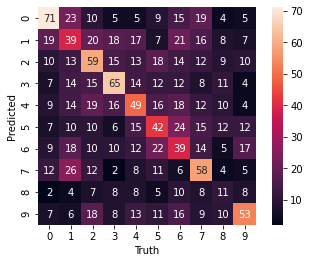

In [23]:
import seaborn as sns
sns.heatmap(cm, square=True, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [24]:
print(classification_report(y_test,pred_dt, zero_division="warn"))

              precision    recall  f1-score   support

           0       0.46      0.43      0.45       166
           1       0.23      0.23      0.23       172
           2       0.33      0.34      0.33       173
           3       0.42      0.40      0.41       162
           4       0.32      0.29      0.31       167
           5       0.27      0.27      0.27       153
           6       0.22      0.25      0.24       156
           7       0.34      0.40      0.37       144
           8       0.13      0.15      0.14        71
           9       0.42      0.35      0.38       151

   micro avg       0.32      0.32      0.32      1515
   macro avg       0.32      0.31      0.31      1515
weighted avg       0.33      0.32      0.32      1515
 samples avg       0.32      0.32      0.32      1515

